## Aula 01 - Dados Textuais: classificação e exploração.

In [0]:
#from google.colab import files
#uploaded = files.upload()

In [0]:
#import pandas as pd
#import io
#resenha = pd.read_csv(io.StringIO(uploaded['imdb-reviews-pt-br.csv'].decode('utf-8')))
#resenha.head()

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
import pandas as pd
link = "https://drive.google.com/open?id=1BxoBSfhT0F9hnt8tsVD30qclhqRGNgNM"

In [0]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1BxoBSfhT0F9hnt8tsVD30qclhqRGNgNM


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('imdb-reviews-pt-br.csv')  
resenha = pd.read_csv('imdb-reviews-pt-br.csv')

In [0]:
resenha.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [0]:
from sklearn.model_selection import train_test_split

treino, teste, classe_treino, classe_teste = train_test_split(resenha.text_pt,
                                                              resenha.sentiment,
                                                              random_state = 42)

In [0]:
from sklearn.linear_model import LogisticRegression

regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)
acuracia = regressao_logistica.score(teste, classe_teste)
print(acuracia)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: ignored

Ocorre erro pois os textos não podem ser classificados de forma simples. Temos que abordar o problema de outra forma.

In [0]:
print("Negativa \n")
print(resenha.text_pt[189])

Negativa 

Este é sem dúvida o pior filme que eu já vi. E acredite em mim, eu vi muitos filmes. A reviravolta inacreditável que o filme faz - passando de um extremamente mau filme "Formas de vida alienígenas habitam a terra", com um filme que tenta espalhar um arquicristiano "O dia do julgamento está próximo, buscar Jesus ou queimar por toda a eternidade em as dívidas ardentes do inferno "mensagem - deixou-me atordoado depois de ter sido atormentado por 85 minutos. Até mesmo os cristãos religiosos devem se envergonhar ou ficar furiosos ao ver suas crenças postadas dessa maneira. Eu não sabia o que fazer comigo quando assisti a atuação horrível que poderia ter sido realizada por crianças de 7 anos de idade. Simplesmente repugnante. Eu não sou cristão nem muito religioso. Mas se eu estivesse, não teria mais medo do Inferno. Rich Christiano mostrou ser algo muito pior.


In [0]:
print("Positivo \n")
print(resenha.text_pt[49002])

Positivo 

Crescendo em Nova York no final dos anos 80 e início dos anos 90, posso dizer pessoalmente que este é um dos documentários mais importantes feitos para cobrir esse lugar neste período de tempo. Não Madonna não veio com a idéia de Voguing, mas é de onde ela tirou! Em vez de combater a violência uns dos outros ou em brigas de gato, o voguing permitia que as pessoas "lutassem" dentro dos confins de tudo, menos que tocassem umas às outras, o que justificaria uma desqualificação automática. Vendo este tipo de extraordinariamente talentosas / bem orquestradas "jogadas" nos clubes foi nada menos do que espetacular e todos os grandes nomes de antigamente estão aqui ... Pepper La Beija, Paris Duprée, Xtragavaganza, etc. ..tudo comemorado nos gostos de peças de época como a música de Malcom McLarens "Deep in Vogue" ... não importava quem você era, ou de onde você era porque quando você passava por aquelas portas nesse "reino mágico" de De certa forma, você se tornou parte de algo maio

In [0]:
print(resenha.sentiment.value_counts())

neg    24765
pos    24694
Name: sentiment, dtype: int64


In [0]:
resenha.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [0]:
classificacao = resenha["sentiment"].replace(["neg", "pos"], [0,1])

In [0]:
resenha["classificacao"] = classificacao

In [0]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [0]:
resenha.tail()

,id,text_en,text_pt,sentiment,classificacao
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1
49458,49460,Working-class romantic drama from director Mar...,O drama romântico da classe trabalhadora do di...,pos,1


In [0]:
from sklearn.feature_extraction.text import CountVectorizer

texto = ["Assisti um filme ótimo", "Assisti um filme ruim"]

vetorizar = CountVectorizer(lowercase = False)

bag_of_words = vetorizar.fit_transform(texto)

In [0]:
vetorizar.get_feature_names()

['Assisti', 'filme', 'ruim', 'um', 'ótimo']

In [0]:
bag_of_words

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [0]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words,
                      columns = vetorizar.get_feature_names())

In [0]:
matriz_esparsa

,Assisti,filme,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


In [0]:
vetorizar = CountVectorizer(lowercase = False)

bag_of_words = vetorizar.fit_transform(resenha.text_pt)

print(bag_of_words.shape)

(49459, 156923)


O resultado foi de um vetor com 156923 dimensões. Isso pode sobrecarregar demais nosso algorítmo. Para reduzir, podemos passar a variável max_feature para a função CountVectorizer, para limitar o número de palavras que constarão em nosso dicionário:

In [0]:
vetorizar = CountVectorizer(lowercase = False,
                            max_features = 50)

bag_of_words = vetorizar.fit_transform(resenha.text_pt)

print(bag_of_words.shape)

(49459, 50)


In [0]:
treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                              resenha.classificacao,
                                                              random_state = 42)
regressao_logistica = LogisticRegression(solver = 'lbfgs')
regressao_logistica.fit(treino, classe_treino)
acuracia = regressao_logistica.score(teste, classe_teste)
print(acuracia)

0.6583097452486858


In [0]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):
  vetorizar = CountVectorizer(lowercase = False,
                              max_features = 50)
  bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
  treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                              texto[coluna_classificacao],
                                                              random_state = 42)
  regressao_logistica = LogisticRegression(solver = 'lbfgs')
  regressao_logistica.fit(treino, classe_treino)
  return regressao_logistica.score(teste, classe_teste)
print(classificar_texto(resenha, "text_pt", "classificacao"))

0.6583097452486858


#Como podemos ter certeza de que estas palavras no dicionário são relevantes? Como podemos visualizar quais palavras estão sendo consideradas como mais relevantes?
Para criar uma visualização, usaremos a núvem de palavras, muito usada para mostrar hashtags mais comentadas no tweeter, por exemplo.

In [0]:
%matplotlib inline

from wordcloud import WordCloud



# Usar list Comprehension para colocar todas as palavras em um único vetor
Como o Word Cloud precisa de um único vetor com todas as palavras, vamos usar o list Comprehension para colocar tudo em uma lista só, contendo todas as frases.

In [0]:
todas_palavras = [texto for texto in resenha.text_pt]
todas_palavras[:3]

['Mais uma vez, o Sr. Costner arrumou um filme por muito mais tempo do que o necessário. Além das terríveis seqüências de resgate no mar, das quais há muito poucas, eu simplesmente não me importei com nenhum dos personagens. A maioria de nós tem fantasmas no armário, e o personagem Costers é realizado logo no início, e depois esquecido até muito mais tarde, quando eu não me importava. O personagem com o qual deveríamos nos importar é muito arrogante e superconfiante, Ashton Kutcher. O problema é que ele sai como um garoto que pensa que é melhor do que qualquer outra pessoa ao seu redor e não mostra sinais de um armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, quando estamos bem além do meio do caminho, Costner nos conta sobre os fantasmas dos Kutchers. Somos informados de por que Kutcher é levado a ser o melhor sem pressentimentos ou presságios anteriores. Nenhuma mágica aqui, era tudo que eu podia fazer para não desligar uma hora.',
 'Este é um exemp

In [0]:
len(todas_palavras)

49459

In [0]:
todas_palavras = ' '.join([texto for texto in resenha.text_pt])
todas_palavras[:3]

'Mai'

In [0]:
len(todas_palavras)

63448424

Geração da nuvem de palavras. Demora alguns minutos:

In [0]:
nuvem_de_palavras = WordCloud().generate(todas_palavras)

In [0]:
nuvem_de_palavras

In [0]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show>

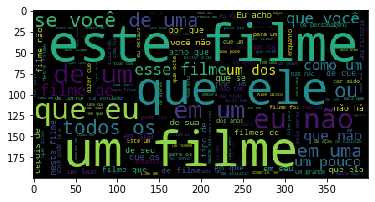

In [0]:
plt.figure()
plt.imshow(nuvem_de_palavras)
plt.show

Conclusão: As palavras mais frequentes são palavras que não agregam muito para a análise dos textos. Palavras como "um", "uma", "este", "que", "de", "ou" não expressam ideia.

#Melhorando o word cloud, andes de trabalhar as palavras:

<function matplotlib.pyplot.show>

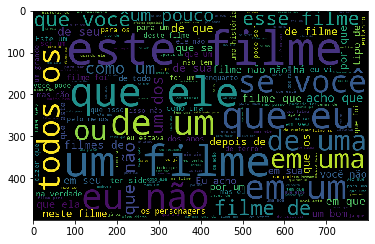

In [0]:
nuvem_de_palavras = WordCloud(width = 800,
                              height = 500,
                              max_font_size = 110).generate(todas_palavras)

plt.figure()
plt.imshow(nuvem_de_palavras)
plt.show

<function matplotlib.pyplot.show>

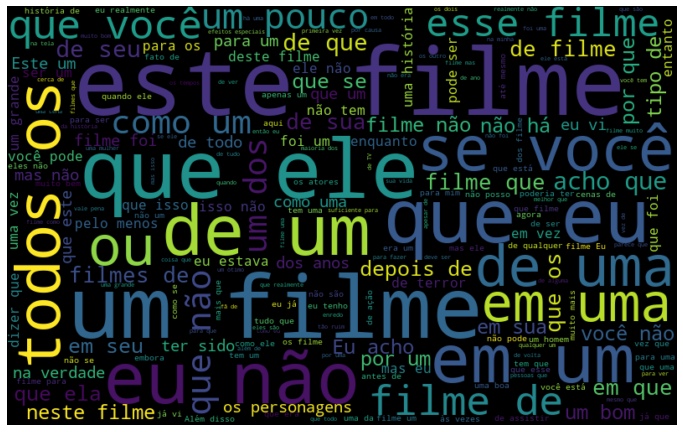

In [0]:
plt.figure(figsize = (12,10))
plt.imshow(nuvem_de_palavras, interpolation = 'bilinear')
plt.axis('off')
plt.show

<function matplotlib.pyplot.show>

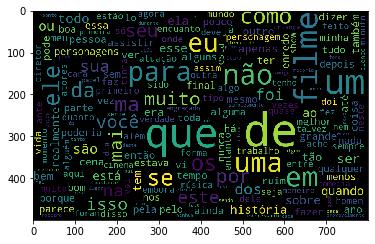

In [0]:
nuvem_de_palavras = WordCloud(width = 800,
                              height = 500,
                              max_font_size = 110,
                              collocations = False).generate(todas_palavras)

plt.figure()
plt.imshow(nuvem_de_palavras)
plt.show

<function matplotlib.pyplot.show>

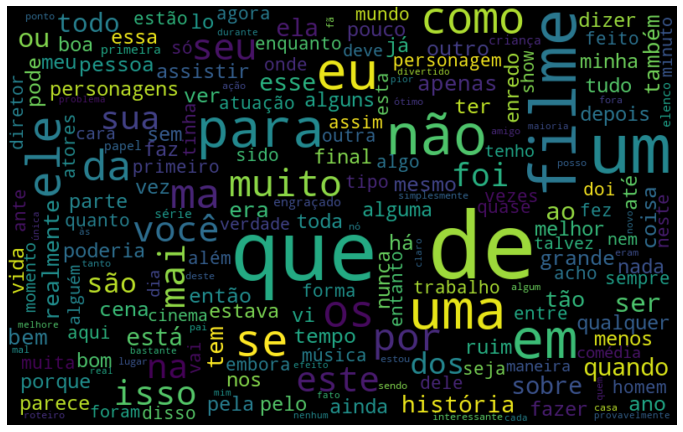

In [0]:
plt.figure(figsize = (12,10))
plt.imshow(nuvem_de_palavras, interpolation = 'bilinear')
plt.axis('off')
plt.show

#Agora com visualização da núvem de palavras ajustada, precisamos separar em duas nuvens, uma para as frases positivas e uma para as frases negativas

In [0]:
resenha.query("sentiment == 'pos'")

,id,text_en,text_pt,sentiment,classificacao
12389,12391,I went and saw this movie last night after bei...,Eu fui e vi este filme ontem à noite depois de...,pos,1
12390,12392,Actor turned director Bill Paxton follows up h...,"O diretor do ator, Bill Paxton, segue sua prom...",pos,1
12391,12393,As a recreational golfer with some knowledge o...,Como um jogador de recreio com algum conhecime...,pos,1
12392,12394,"I saw this film in a sneak preview, and it is ...","Eu vi esse filme em uma prévia, e é delicioso....",pos,1
12393,12395,Bill Paxton has taken the true story of the 19...,Bill Paxton levou a verdadeira história do gol...,pos,1
...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1


Criar função para tipo de sentimento:

In [0]:
def nuvem_palavras_neg(texto, coluna_texto):
  texto_negativo = texto.query("sentiment == 'neg'")
  todas_palavras = ' '.join([texto for texto in texto_negativo[coluna_texto]])

  nuvem_de_palavras = WordCloud(width=800,
                                height = 500,
                                max_font_size = 110,
                                background_color="black",
                                collocations = False).generate(todas_palavras)

  plt.figure(figsize = (12,10))
  plt.imshow(nuvem_de_palavras, interpolation = 'bilinear')
  plt.axis('off')
  plt.show


In [0]:
def nuvem_palavras_pos(texto, coluna_texto):
  texto_positivo = texto.query("sentiment == 'pos'")
  todas_palavras = ' '.join([texto for texto in texto_positivo[coluna_texto]])

  nuvem_de_palavras = WordCloud(width=800,
                                height = 500,
                                max_font_size = 110,
                                background_color="white",
                                collocations = False).generate(todas_palavras)

  plt.figure(figsize = (12,10))
  plt.imshow(nuvem_de_palavras, interpolation = 'bilinear')
  plt.axis('off')
  plt.show

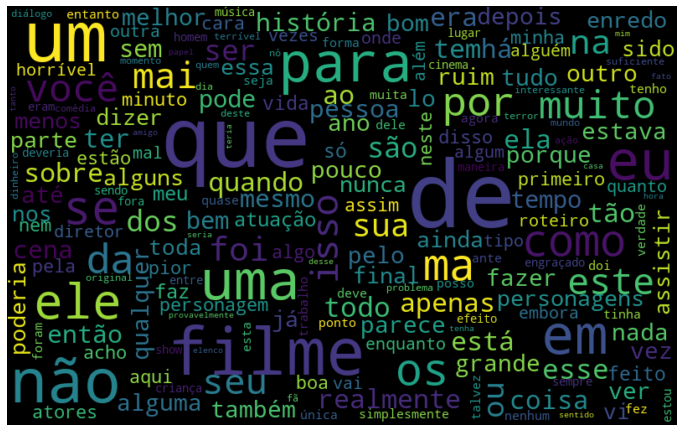

In [0]:
nuvem_palavras_neg(resenha, "text_pt")

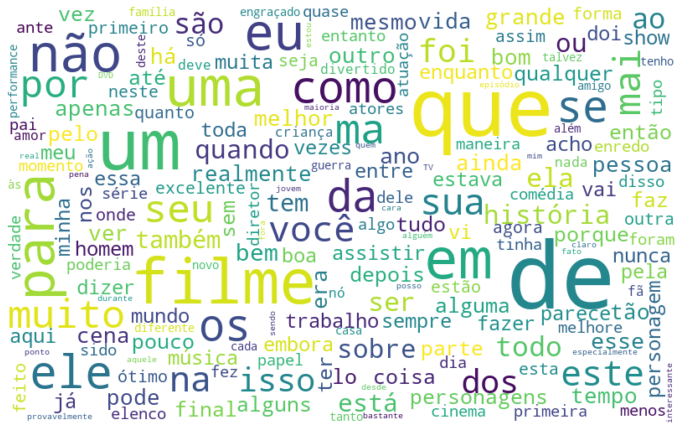

In [0]:
nuvem_palavras_pos(resenha, "text_pt")

#Melhorando os dados com frequência de cada palavra: biblioteca NLTK

In [0]:
import nltk
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [0]:
frase = ["um filme ruim", "um filme bom"]
frequencia = nltk.FreqDist(frase)
frequencia

FreqDist({'um filme bom': 1, 'um filme ruim': 1})

O NLTK leva em consideração cada item da lista. Para analisarmos por palavra, teremos que realizar uma tokenização das frases.
#EXEMPLO de tokenização:

In [0]:
from nltk import tokenize

frase = "bem vindo ao mundo do PLN!"

token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)
token_frase

['bem', 'vindo', 'ao', 'mundo', 'do', 'PLN!']

#Aplicando tokenização do nltk em nossos dados:

In [0]:
token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(todas_palavras)

frequencia = nltk.FreqDist(token_frase)
frequencia

FreqDist({'Mais': 1538,
          'uma': 130888,
          'vez,': 1927,
          'o': 244881,
          'Sr.': 1741,
          'Costner': 50,
          'arrumou': 3,
          'um': 216410,
          'filme': 117543,
          'por': 61339,
          'muito': 51761,
          'mais': 53504,
          'tempo': 10424,
          'do': 101737,
          'que': 325070,
          'necessário.': 135,
          'Além': 3631,
          'das': 16496,
          'terríveis': 576,
          'seqüências': 586,
          'de': 417651,
          'resgate': 152,
          'no': 57145,
          'mar,': 63,
          'quais': 1537,
          'há': 15824,
          'poucas,': 7,
          'eu': 68814,
          'simplesmente': 6436,
          'não': 127915,
          'me': 19136,
          'importei': 109,
          'com': 99174,
          'nenhum': 4531,
          'dos': 41222,
          'personagens.': 1027,
          'A': 31547,
          'maioria': 5565,
          'nós': 3944,
          'tem': 2498

In [0]:
df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                              "Frequência": list(frequencia.values())})

In [0]:
df_frequencia

,Palavra,Frequência
0,Mais,1538
1,uma,130888
2,"vez,",1927
3,o,244881
4,Sr.,1741
...,...,...
348280,"Muppified,",1
348281,inventora,1
348282,"""Union",1
348283,beirar,1


In [0]:
df_frequencia.nlargest(columns = "Frequência", n = 10)

,Palavra,Frequência
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


Usando gráfico de pareto (80-20) para verificar as 20% de palavras mais frequentes

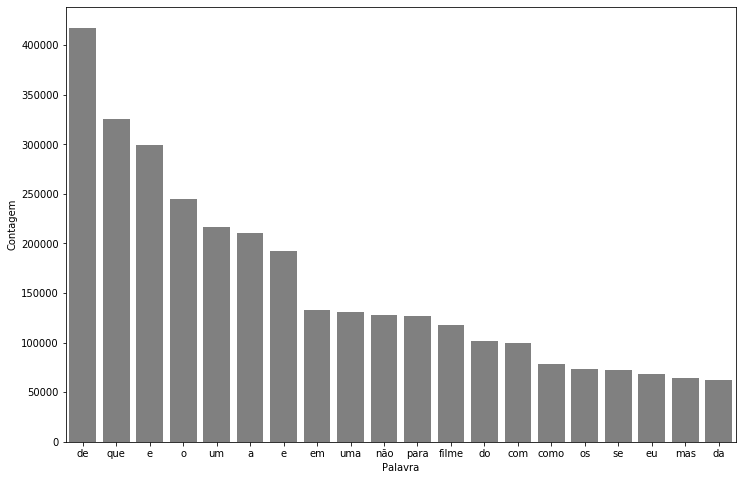

In [0]:
import seaborn as sns

plt. figure(figsize =(12,8))
ax = sns.barplot(data = df_frequencia.nlargest(columns = "Frequência", n = 20), x = "Palavra", y = "Frequência", color = 'gray')
ax.set(ylabel = "Contagem")
plt.show()

#Criação da função para fazer o diagrama de Pareto

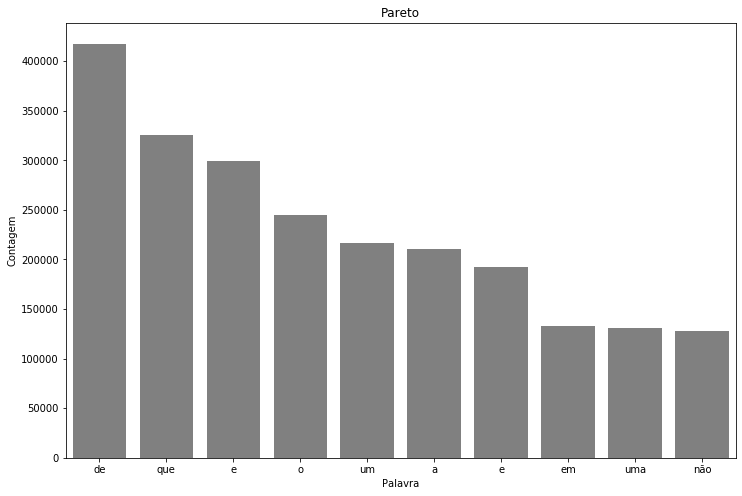

In [0]:
import seaborn as sns

def pareto(texto, coluna_texto, quantidade):
  todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])

  token_espaco = tokenize.WhitespaceTokenizer()
  token_frase = token_espaco.tokenize(todas_palavras)

  frequencia = nltk.FreqDist(token_frase)

  df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                "Frequência": list(frequencia.values())})
  df_frequencia = df_frequencia.nlargest(columns = "Frequência", n = quantidade)
  plt. figure(figsize =(12,8))
  ax = sns.barplot(data = df_frequencia, x = "Palavra", y = "Frequência", color = 'gray')
  ax.set(ylabel = "Contagem")
  plt.title("Pareto")
  plt.show()

pareto(resenha, "text_pt", 10)

#Limpar palavras desnecessárias (stop words):
de, que, um, uma, etc...

In [0]:
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")

In [0]:
print(palavras_irrelevantes)

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estiv

In [0]:
len(palavras_irrelevantes)

204

In [0]:

frase_processada = list()
for opiniao in resenha.text_pt:
  nova_frase = list()
  palavras_texto = token_espaco.tokenize(opiniao)
  for palavra in palavras_texto:
    if palavra not in palavras_irrelevantes:
        nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))

resenha["tratamento_1"] = frase_processada

In [0]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


Testando novos textos limpos:

In [0]:
classificar_texto(resenha, "tratamento_1", "classificacao")

0.6607359482410028

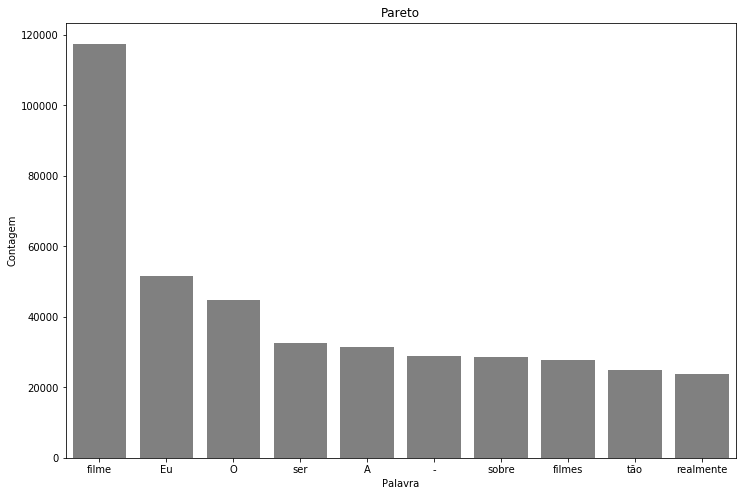

In [0]:
pareto(resenha, "tratamento_1", 10)

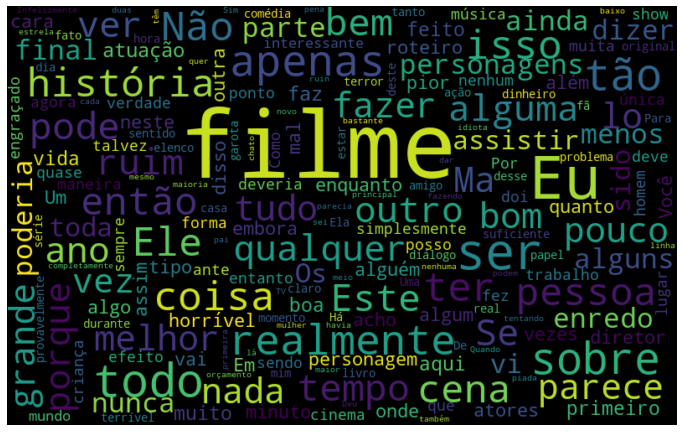

In [0]:
nuvem_palavras_neg(resenha, "tratamento_1")

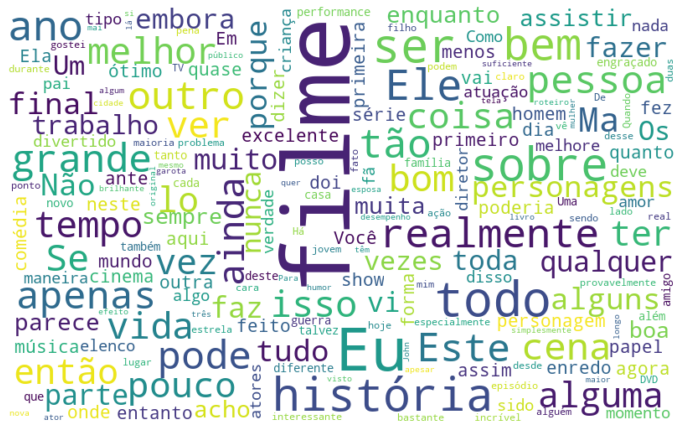

In [0]:
nuvem_palavras_pos(resenha, "tratamento_1")

#Melhorar ainda mais a análise de palavras

#Exemplo de predição com keras de forma linear.

In [0]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [0]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')

In [0]:
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-2.0, 1.0, 4.0, 7.0, 10.0, 13.0], dtype=float)

In [0]:
model.fit(xs, ys, epochs=5000)

In [0]:
print(model.predict([-100000.0]))

In [0]:
import numpy as np

In [0]:
print(int(np.round(model.predict([-100000.0]))))